### The diameter of the pilot on an output shaft is a special characteristic. The upper and lower specification limits for the diameter are USL= 25 and LSL= -25, respectively, when the measured quantity is the number of microns from nominal. A previous study verified that the measurement system utilized introduces very little measurement error. As part of a PPAP demonstration study, 300 units are produced. The data were classified into 25 subgroups of 4 observations each by measuring the diameter of the first four units in each batch of twelve units. Table below give the 100 recorded data observations.

Conclude your finding about the process capability using:

a) Histogram plot

b) Probability plot

c) 𝐶𝑝 and 𝐶𝑝𝑘

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 
import seaborn as sns

In [37]:
df=pd.read_csv("C:\\Users\\Lenovo\\OneDrive\\Desktop\\SQC_lab\\lab4\\pilot_od.csv")
df

,subgroup,1,2,3,4,Xi_bar,Ri
0,1,-10,-6,0,0,-4.0,10
1,2,-14,-4,-6,4,-5.0,18
2,3,-2,12,-2,8,4.0,14
3,4,-4,-6,-6,-2,-4.5,4
4,5,12,6,2,2,5.5,10
5,6,0,0,-6,-8,-3.5,8
6,7,2,-6,8,-6,-0.5,14
7,8,0,6,4,8,4.5,8
8,9,2,4,6,8,5.0,6
9,10,-8,0,-4,2,-2.5,10


In [38]:
### histogram plot

hist_data = pd.concat([df.iloc[:,i] for i in range(1,5)],ignore_index=True)
hist_data


0    -10
1    -14
2     -2
3     -4
4     12
      ..
95     6
96     4
97     4
98     4
99     2
Length: 100, dtype: int64

In [39]:
USL = 25
LSL = -25
mean = hist_data.mean()
std = hist_data.std()
max = hist_data.max()
min = hist_data.min()

print(f'Process USL {USL}\nProcess LSL {LSL}')
print(f'The mean of the process is {mean}\nStandard deviation is {std} ')
print(f'Minimum value is {min}\nMaximum value is {max}')

Process USL 25
Process LSL -25
The mean of the process is 0.74
Standard deviation is 6.114430687011065 
Minimum value is -14
Maximum value is 18


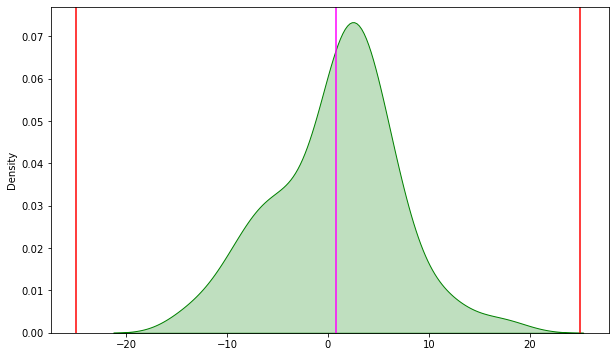

In [40]:
### plot the distribution 

plt.figure(figsize=(10, 6))
sns.kdeplot(hist_data, shade=True, color='green')
plt.axvline(x=USL, c='red')
plt.axvline(x=LSL, c='red')
plt.axvline(x=mean, c='magenta')
plt.show()

The process has been deviated from the mean

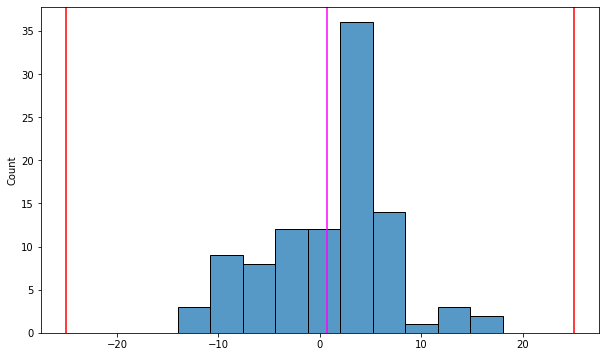

In [41]:
# Using the floor of K ---> 7 bins
plt.figure(figsize=(10, 6))
sns.histplot(hist_data)
plt.axvline(x=USL, c='red')
plt.axvline(x=LSL, c='red')
plt.axvline(x=mean, c='magenta')
plt.show()

The process is not normally distributed

Probability plot

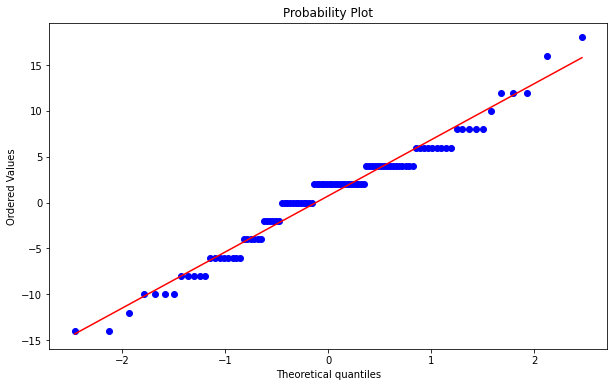

In [42]:
# Sorting the data into ascending order
from scipy import stats
plt.figure(figsize=(10, 6))
stats.probplot(hist_data, dist=stats.norm, plot=plt)
plt.show()

We can observe that the data is not normally distributed

In [43]:
stats.normaltest(hist_data)

NormaltestResult(statistic=0.8664434328230234, pvalue=0.6484167112399293)

p-value is less than 0.05, Hence the data is not normally distributed 

In [44]:
### define the Cp index (basically provide us the information of potential variability)

x=hist_data
def Cp(x,usl,lsl):
    sigma = x.std()
    Cp = (usl-lsl)/(6*sigma)
    return Cp

In [45]:
### define the Cpk index

def Cpk(x,usl,lsl):
    sigma=x.std()
    m=x.mean()
    Cpu = (usl-m)/(3*sigma)
    Cpl = (m-lsl)/(3*sigma)
    Cpk = np.min([Cpu,Cpl])
    return Cpu,Cpl,Cpk


In [46]:
### Define the specification limits

usl = 25
lsl= -25

In [47]:
### calculate the Cp value

Cp=Cp(x,usl,lsl)
print("Cp is: ",Cp)

Cp is:  1.3628960339735146


* From the Cp value we can say that process is capable. That means the variation that was allowed by the customer so our process is producing the lesser variation against the allowed variation.

In [48]:
# Cpk value

Cpu=Cpk(x,usl,lsl)[0]
Cpl=Cpk(x,usl,lsl)[1]
Cpk=Cpk(x,usl,lsl)[2]
print("Cpu is: ",Cpu)
print("Cpl is: ",Cpl)
print("Cpk is: ",Cpk)


Cpu is:  1.3225543113678986
Cpl is:  1.4032377565791305
Cpk is:  1.3225543113678986


* In order to understand whether it is sifting towards the upper specification or lower specificaton we need to check the value of Cpl and Cpu.

* The value of Cpk=1.3225 Cpu =1.3225 and Cpl = 1.4032. From these values Cpu value is lower compared to Cpl. That means Cpk is equal to Cpu.

* Cp and Cpk values are not equal that means we are not hitting the target. That is indicating that from Cpk value and Cpu value our process mean is shifting towards the upper specification limit.


* R chart

In [49]:
### r chart
Ri_bar=df['Ri'].sum()/25
Ri_bar

9.76

In [50]:
D4=2.28
D3=0
uclr=D4*Ri_bar
lclr=D3*Ri_bar

In [51]:
uclr

22.252799999999997

In [52]:
lclr

0.0

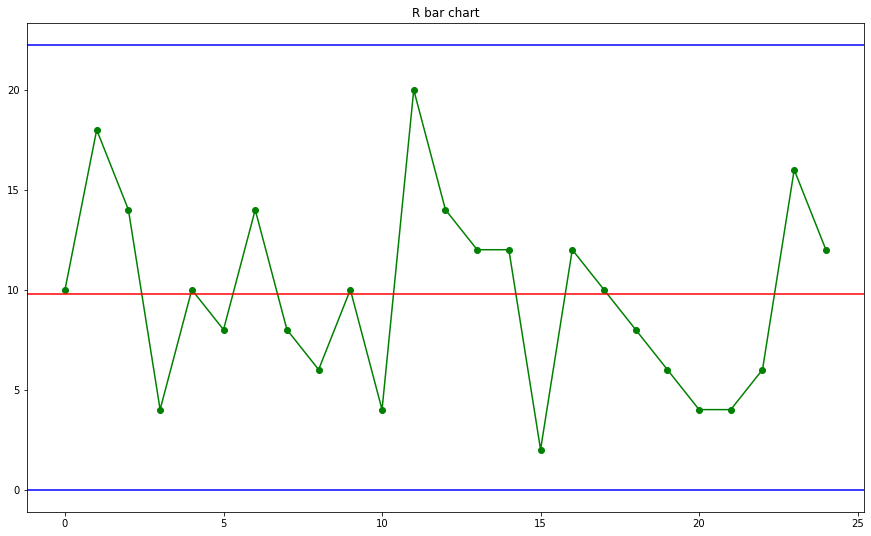

In [53]:
plt.figure(figsize=(15,9))
plt.title('R bar chart')
plt.plot(range(len(df.Ri)), df.Ri ,'go-')
plt.axhline(y=uclr, color='b', linestyle='-')
plt.axhline(y=lclr, color='b', linestyle='-')
plt.axhline(y=Ri_bar, color='r', linestyle='-') 

* X_bar chart

In [54]:
### x_bar chart
Xi_bar_bar=df['Xi_bar'].sum()/25
Xi_bar_bar

0.74

In [55]:
A2=0.73
uclx=Xi_bar_bar+A2*Ri_bar
lclx=Xi_bar_bar-A2*Ri_bar

In [56]:
uclx

7.8648

In [57]:
lclx

-6.384799999999999

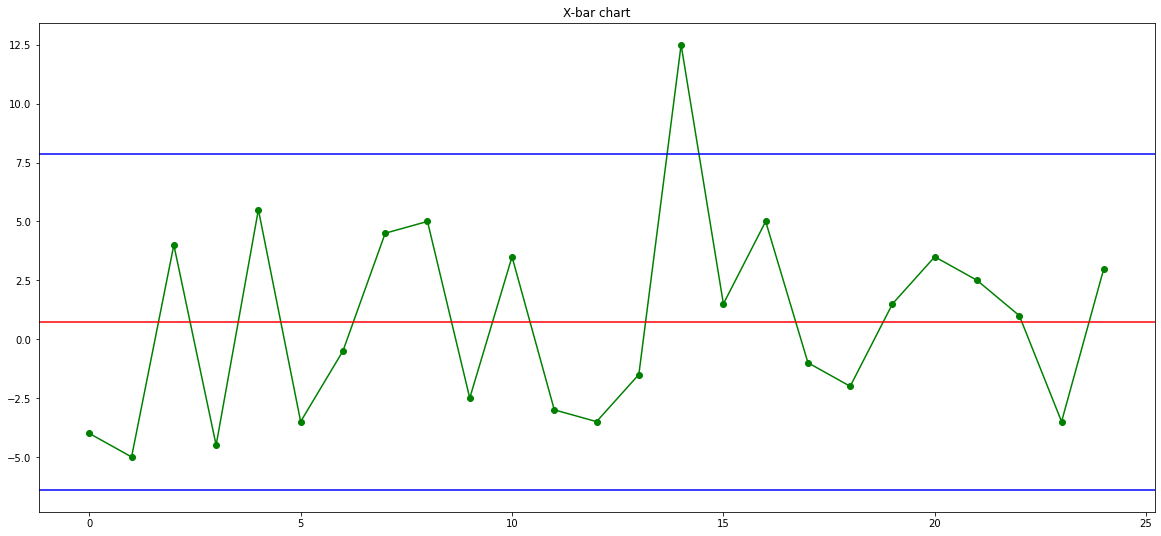

In [58]:
plt.figure(figsize=(20,9))
plt.title('X-bar chart')
plt.plot(range(len(df.Xi_bar)), df.Xi_bar ,'go-' )
plt.axhline(y=uclx, color='b', linestyle='-')
plt.axhline(y=lclx, color='b', linestyle='-')
plt.axhline(y=Xi_bar_bar, color='r', linestyle='-')


In [59]:
### find the point that is out of control and drop it
out=df[df['Xi_bar'] > uclx]
out

,subgroup,1,2,3,4,Xi_bar,Ri
14,15,6,16,10,18,12.5,12


In [60]:
df.drop(index=14,inplace=True)

In [61]:
### x_bar chart
Xi_bar_bar=df['Xi_bar'].sum()/25
Xi_bar_bar

0.24

In [62]:
A2=0.73
uclx=Xi_bar_bar+A2*Ri_bar
lclx=Xi_bar_bar-A2*Ri_bar

In [63]:
uclx

7.3648

In [64]:
lclx

-6.884799999999999

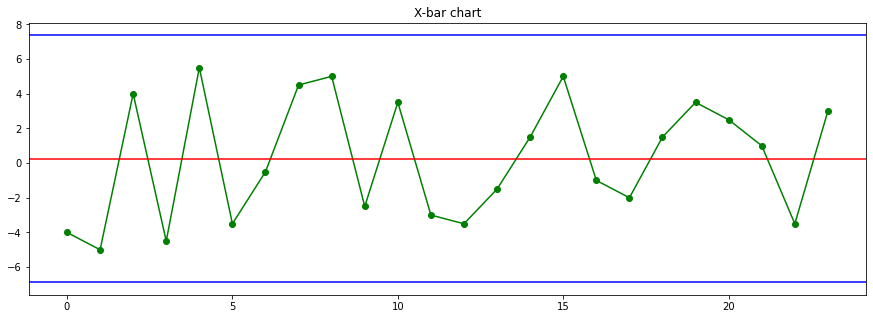

In [65]:
plt.figure(figsize=(15,5))
plt.title('X-bar chart')
plt.plot(range(len(df.Xi_bar)), df.Xi_bar ,'go-' )
plt.axhline(y=uclx, color='b', linestyle='-')
plt.axhline(y=lclx, color='b', linestyle='-')
plt.axhline(y=Xi_bar_bar, color='r', linestyle='-')